In [2]:
import os, pandas as pd, numpy as np

In [3]:
os.chdir("C:\\Users\\RIDDHI\\OneDrive\\Desktop\\Bootcamp\\SCMA\\SCMA A1a")

In [4]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [5]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [6]:
HR = df[df['state']==6]

In [7]:
HR.isnull().sum().sort_values(ascending = False)

soyabean_v             2591
soyabean_q             2591
Meals_School           2586
Meals_Employer         2561
Otherwise_possessed    2552
                       ... 
palak_q                   0
carrot_q                  0
radish_q                  0
brinjal_q                 0
fv_tot                    0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [9]:
HR_new = HR[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [10]:
HR_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       14
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [11]:
HR_clean = HR_new.copy()

In [12]:
HR_clean.loc[:, 'Meals_At_Home'] = HR_clean['Meals_At_Home'].fillna(HR_new['Meals_At_Home'].mean())

In [13]:
HR_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [14]:
# Outlier Checking

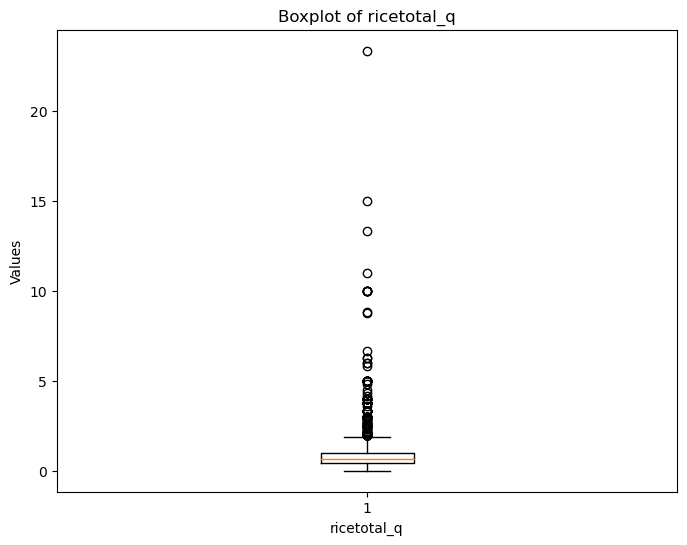

In [15]:
import matplotlib.pyplot as plt
# Assuming HR_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(HR_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [16]:
rice1 = HR_clean['ricetotal_q'].quantile(0.25)
rice2 = HR_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [17]:
HR_clean=HR_new[(HR_new['ricetotal_q']<=up_limit)&(HR_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x281381ecdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x281381ee5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x281381ec190>],
 'medians': [<matplotlib.lines.Line2D at 0x281381efb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x281381f85d0>],
 'means': []}

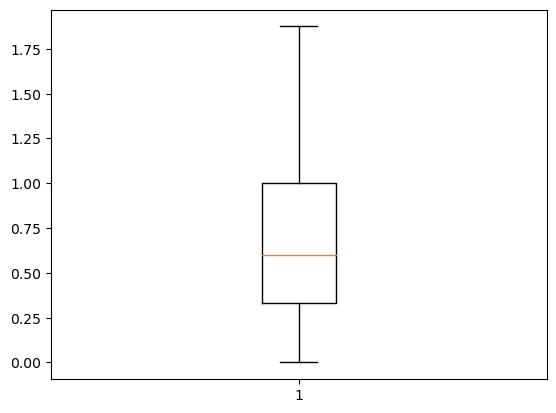

In [18]:
plt.boxplot(HR_clean['ricetotal_q'])

In [19]:
HR_clean['District'].unique()

array([19, 20, 18, 17, 13, 14, 16, 15, 12, 11,  8, 10,  7,  9,  6,  5,  2,
        4,  1,  3], dtype=int64)

In [20]:
# Replace values in the 'Sector' column
HR_clean.loc[:,'Sector'] = HR_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [23]:
HR_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home',
       'total_consumption'],
      dtype='object')

In [24]:
HR_clean.loc[:, 'total_consumption'] = HR_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [25]:
HR_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
35704,HR,19,RURAL,1,61,1.250000,4.000000,0.125000,0,0.0,0.062500,40.925704,50.000000,90.0,96.363204
35705,HR,19,RURAL,1,61,0.500000,5.833333,0.166667,0,0.0,0.333333,27.441958,50.000000,90.0,84.275292
35706,HR,19,RURAL,1,61,0.833333,6.000000,0.083333,0,0.0,0.083333,31.767038,33.333333,90.0,72.100372
35707,HR,19,RURAL,1,61,1.000000,5.000000,0.250000,0,0.0,0.125000,37.100600,50.000000,90.0,93.475600
35708,HR,19,RURAL,1,61,0.600000,3.000000,0.100000,0,0.0,0.000000,26.894340,40.000000,90.0,70.594340


In [26]:
HR_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              40.507237  68.320565  341.600540  0.0
2              41.183953  69.939714  398.575697  0.0

In [27]:
HR_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                38.181369  52.824764  221.510681   0.000000
2                39.207696  66.928629  301.000000   0.000000
3                39.402640  68.002866  202.685775   0.000000
4                44.345725  75.377076  268.210880   0.000000
5                20.622553  63.232255  155.833592   5.200000
6                43.800549  74.134510  237.194597  24.743014
7                47.837338  62.757131  286.466475  18.212950
8                25.882125  63.639780  219.143883  21.400099
9                59.267799  94.618657  398.575697  22.137594
10               37.173055  61.799657  267.175500  16.171557
11               39.565365  70.874423  230.880707  19.353525
12               26.996086  58.430204  146.900320  16.080000
13               28.944806  62.573666  189.975125  20.716842
14               31.664410  69.139450  173.135417  19.548236
15               33.159221  65.717595  203.780300  26.303238
16               33.313788  66.445843  271.748360  28.340262
17               38.401309  69.888708  269.837762   0.000000
18               54.804869  80.008567  296.307397   0.500000
19               45.273351  71.616126  266.930460  21.775433
20               43.828156  60.284774  341.600540  21.468914

In [28]:
total_consumption_by_districtcode=HR_clean.groupby('District')['total_consumption'].sum()

In [29]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
19    16829.789693
9     14855.129103
11    10702.037831
Name: total_consumption, dtype: float64

In [35]:
HR_clean.loc[:,"District"] = HR_clean.loc[:,"District"].replace({13:"Bhiwani", 9:"Jind", 11:"Sirsa"})

In [36]:
total_consumption_by_districtname=HR_clean.groupby('District')['total_consumption'].sum()

In [37]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Faridabad    16829.789693
Jind         14855.129103
Sirsa        10702.037831
Name: total_consumption, dtype: float64

In [38]:
from statsmodels.stats import weightstats as stests

In [39]:
rural=HR_clean[HR_clean['Sector']=="RURAL"]
urban=HR_clean[HR_clean['Sector']=="URBAN"]

In [40]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
35704,HR,Faridabad,RURAL,1,61,1.250000,4.000000,0.125000,0,0.0,0.062500,40.925704,50.000000,90.0,96.363204
35705,HR,Faridabad,RURAL,1,61,0.500000,5.833333,0.166667,0,0.0,0.333333,27.441958,50.000000,90.0,84.275292
35706,HR,Faridabad,RURAL,1,61,0.833333,6.000000,0.083333,0,0.0,0.083333,31.767038,33.333333,90.0,72.100372
35707,HR,Faridabad,RURAL,1,61,1.000000,5.000000,0.250000,0,0.0,0.125000,37.100600,50.000000,90.0,93.475600
35708,HR,Faridabad,RURAL,1,61,0.600000,3.000000,0.100000,0,0.0,0.000000,26.894340,40.000000,90.0,70.594340


In [41]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
93022,HR,Mewat,URBAN,1,61,0.750000,10.750000,0.050000,0,0.000000,0.000000,34.612875,17.500000,90.0,63.662875
93023,HR,Mewat,URBAN,1,61,0.571429,9.285714,0.035714,0,0.142857,0.000000,24.278829,21.428571,84.0,55.743114
93024,HR,Mewat,URBAN,1,61,0.600000,9.000000,0.050000,0,0.100000,0.000000,23.785215,21.000000,84.0,54.535215
93025,HR,Mewat,URBAN,1,61,0.666667,7.333333,0.000000,0,0.000000,0.000000,23.141925,31.666667,80.0,62.808592
93026,HR,Mewat,URBAN,1,61,0.666667,8.333333,0.083333,0,0.166667,0.133333,30.900233,41.666667,87.0,81.950233


In [42]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [43]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 7.091254132951441
P-Value: 1.329020295022693e-12
